In [1]:
# lung cancer detection

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd

df = pd.read_csv('survey lung cancer.csv')


# New Section

In [4]:
df['LUNG_CANCER'].value_counts()


YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [5]:
df.shape

(309, 16)

In [6]:
df.describe


<bound method NDFrame.describe of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1  

In [7]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

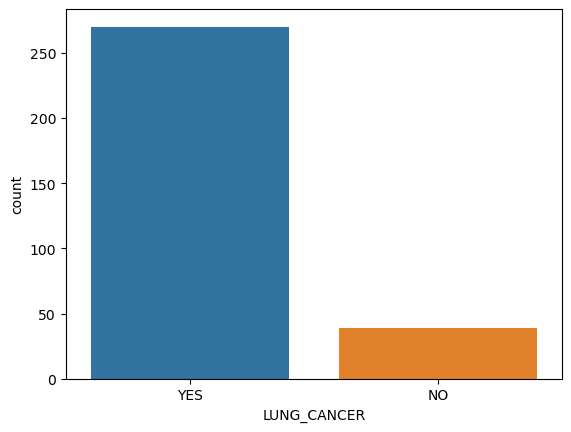

In [9]:
import seaborn as sns
sns.countplot(x=df['LUNG_CANCER'])


C:\Users\pc\AppData\Local\Temp\ipykernel_7880\2232473667.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= df.corr()


<Axes: >

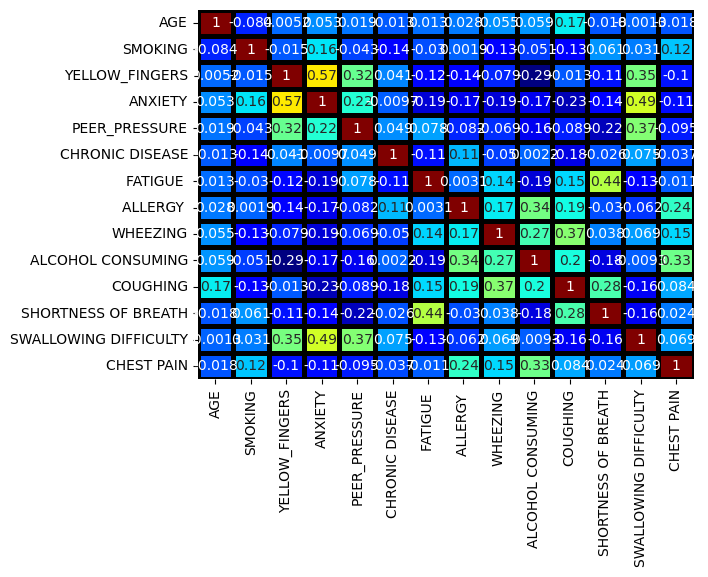

In [10]:
import matplotlib.pyplot as plt
cor= df.corr()
sns.heatmap(cor,annot=True,cbar=False,cmap='jet',linewidth=2.5,linecolor='black')



In [11]:
y=df['LUNG_CANCER']
X = df.drop(['LUNG_CANCER'],axis=1)
print( X.shape)
print(y.shape)

(309, 15)
(309,)


In [12]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
encoded_column = lc.fit_transform(df.iloc[:, 0])
df.iloc[:, 0] = encoded_column
df


C:\Users\pc\AppData\Local\Temp\ipykernel_7880\3853613052.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0] = encoded_column


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [13]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
X=df.drop(columns=['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [15]:
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (216, 15)
Number transactions y_train dataset:  (216,)
Number transactions X_test dataset:  (93, 15)
Number transactions y_test dataset:  (93,)


In [16]:
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (216, 15)
Number transactions y_train dataset:  (216,)
Number transactions X_test dataset:  (93, 15)
Number transactions y_test dataset:  (93,)


In [17]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

              precision    recall  f1-score   support

          NO       0.86      0.40      0.55        15
         YES       0.90      0.99      0.94        78

    accuracy                           0.89        93
   macro avg       0.88      0.69      0.74        93
weighted avg       0.89      0.89      0.88        93

0.9351851851851852
0.8924731182795699


c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

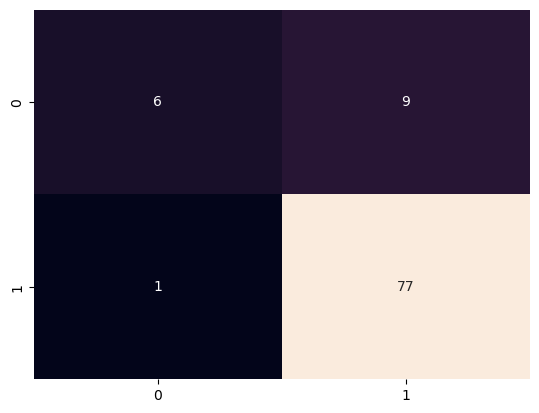

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,cbar=False)

In [19]:
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
clf1=Perceptron()
clf2=LogisticRegression()
clf3=SVC()
clf4=GaussianNB()
clf5=KNeighborsClassifier()
clf6=DecisionTreeClassifier()
clf=[clf1,clf2,clf3,clf4,clf5,clf6]
clf_name=['PERC','LR','SVM','GNB','KNN','DT']
acc={}
T={}
import time
from sklearn.metrics import accuracy_score
for model,model_name in zip(clf,clf_name):
  st=time.time()
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  et=time.time()
  acc[model_name]=accuracy_score(y_pred,y_test)
  T[model_name]=et-st


c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
for i,j in acc.items():
  print(i,":-",j*100)


PERC :- 83.87096774193549
LR :- 89.24731182795699
SVM :- 83.87096774193549
GNB :- 83.87096774193549
KNN :- 83.87096774193549
DT :- 90.32258064516128


Text(0.5, 1.0, 'Lung Cancer Prediction using ML')

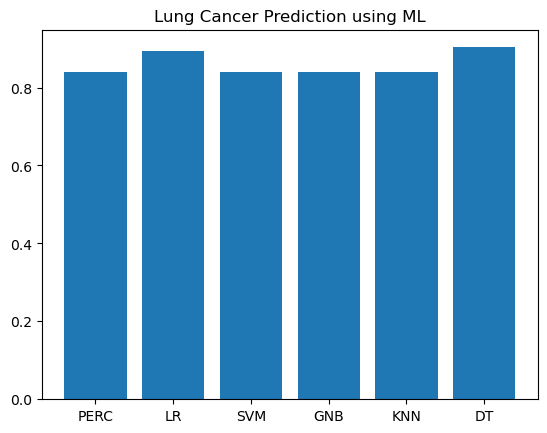

In [21]:
import matplotlib.pyplot as plt
plt.bar(acc.keys(),acc.values())
plt.title('Lung Cancer Prediction using ML')

In [22]:
for i,j in T.items():
  print(i,":-",j)

PERC :- 0.0030057430267333984
LR :- 0.015625
SVM :- 0.0
GNB :- 0.0
KNN :- 0.015630245208740234
DT :- 0.0
